In [55]:
import csv as csv
import pandas as pd
import numpy as np

train = pd.read_csv('wine-reviews\winemag-data_first150k.csv', header=0)

In [56]:
print(train.shape)
train.head()

(150930, 11)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [57]:
country=train.values[:,1]
points=train.values[:,4]
price=train.values[:,5]

x=np.array(train.values[:,4:6])
y=[]
for g in range (100):
    y.append(np.array(train.values[g,4:6]))
    
print (y)    

[array([96, 235.0], dtype=object), array([96, 110.0], dtype=object), array([96, 90.0], dtype=object), array([96, 65.0], dtype=object), array([95, 66.0], dtype=object), array([95, 73.0], dtype=object), array([95, 65.0], dtype=object), array([95, 110.0], dtype=object), array([95, 65.0], dtype=object), array([95, 60.0], dtype=object), array([95, 80.0], dtype=object), array([95, 48.0], dtype=object), array([95, 48.0], dtype=object), array([95, 90.0], dtype=object), array([95, 185.0], dtype=object), array([95, 90.0], dtype=object), array([95, 325.0], dtype=object), array([95, 80.0], dtype=object), array([95, 290.0], dtype=object), array([95, 75.0], dtype=object), array([95, 24.0], dtype=object), array([95, 79.0], dtype=object), array([95, 220.0], dtype=object), array([95, 60.0], dtype=object), array([95, 45.0], dtype=object), array([94, 57.0], dtype=object), array([94, 62.0], dtype=object), array([94, 105.0], dtype=object), array([94, 60.0], dtype=object), array([94, 60.0], dtype=object), a

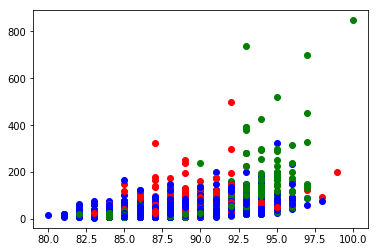

In [58]:
import matplotlib.pyplot as plt

for h in range(10000):
    #print(country[h])
    if country[h]==str("US"):
         plt.plot(points[h],price[h],'bo')
    if country[h]==str("Italy"):
         plt.plot(points[h],price[h],'ro')
    if country[h]==str("France"):
         plt.plot(points[h],price[h],'go')    
        
        

In [43]:
from collections import Counter
counts = Counter(country)
#print(counts)
common_country=[]
country_freq=[]
f=counts.most_common(49)
for j in range (49):
    common_country.append(f[j][0])
    country_freq.append(f[j][1])
    
print(common_country)
print(country_freq)

    

['US', 'Italy', 'France', 'Spain', 'Chile', 'Argentina', 'Portugal', 'Australia', 'New Zealand', 'Austria', 'Germany', 'South Africa', 'Greece', 'Israel', 'Hungary', 'Canada', 'Romania', 'Slovenia', 'Uruguay', 'Croatia', 'Bulgaria', 'Moldova', 'Mexico', 'Turkey', 'Georgia', 'Lebanon', 'Cyprus', 'Brazil', 'Macedonia', 'Serbia', 'Morocco', 'England', 'Luxembourg', 'India', 'Lithuania', 'Czech Republic', nan, 'Ukraine', 'Switzerland', 'Bosnia and Herzegovina', 'South Korea', 'China', 'Slovakia', 'Egypt', 'Albania', 'Japan', 'Montenegro', 'Tunisia', 'US-France']
[62397, 23478, 21098, 8268, 5816, 5631, 5322, 4957, 3320, 3057, 2452, 2258, 884, 630, 231, 196, 139, 94, 92, 89, 77, 71, 63, 52, 43, 37, 31, 25, 16, 14, 12, 9, 9, 8, 8, 6, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 1]


In [179]:
sep_country_points=np.zeros(49)
sep_country_price=np.zeros(49)
#all_country_points=np.zeros((49,62397))
#all_country_price=np.zeros((49,62397))
import math

for t in range (120000):
    for l in range(49):    
        if country[t] == common_country[l]:
            sep_country_points[l]=sep_country_points[l] + points[t]
            #for k in range (62397):
               # if all_country_points[l][k] ==0:
               # all_country_points[l][k] = points[t]
               # break
                
            if math.isnan(price[t]):
                price[t]=0
               
            sep_country_price[l]=sep_country_price[l] + price[t]
          #  for k in range (62397): 
          #  if all_country_price[l][k] ==0:
          #      all_country_price[l][k] = price[t]
          #      break
            #print(price[t],type(price[t]))
    

sep_country_points=sep_country_points/country_freq
print(sep_country_points)

sep_country_price=sep_country_price/country_freq
print(sep_country_price)

[57.9074635  61.54080416 63.43478055 57.61115143 53.380674   52.17474694
 63.79124389 44.17631632 44.68584337 61.72914622 62.65252855 50.85651019
 47.81108597 64.57936508 49.01298701 64.94387755 48.56834532 80.64893617
 47.17391304 71.92134831 60.23376623 33.16901408 70.3968254  86.40384615
 69.65116279 61.08108108 44.67741935 46.72       53.625      87.71428571
 81.33333333 92.88888889 29.         87.625      84.25       85.83333333
  0.         84.6        45.         84.75       81.5        54.66666667
 56.33333333  0.         88.         85.         82.          0.
  0.        ]
[22.50717182 20.47107931 22.55578728 17.41884373 12.55295736 13.03640561
 14.36151823 16.63667541 12.03885542 16.44618907 27.5591354  12.48804252
 12.33257919 22.84126984 26.49350649 25.44387755  6.69064748 21.23404255
 14.5        19.20224719  8.8961039   7.04225352 24.88888889 24.42307692
 15.74418605 16.86486486  8.25806452 11.72        9.5        24.28571429
 18.33333333 42.22222222 13.55555556 13.875  

In [188]:
std_country_points=np.zeros(49)
std_country_price=np.zeros(49)
for t in range (120000):
    for l in range(49):    
        if country[t] == common_country[l]:
            std_country_points[l]=std_country_points[l] + math.pow((points[t]-sep_country_points[l]),2)
            if math.isnan(price[t]):
                price[t]=0
               
            std_country_price[l]=std_country_price[l] + math.pow((points[t]-sep_country_price[l]),2)
            
std_country_points=np.sqrt(std_country_points/country_freq)          
std_country_price=np.sqrt(sep_country_price/country_freq)            

for r in range(49):
    if std_country_points[r] ==0:
        std_country_points[r]=1;
    if std_country_price[r] ==0:
        std_country_price[r]=1;
print(std_country_points)
print(std_country_price)

[26.86647555 24.37281346 23.35570875 26.13791006 28.69145705 30.09833333
 22.38343738 36.14767256 34.80941696 24.88567539 24.19811483 31.45968883
 33.53210393 21.46176629 33.01201561 21.7128546  32.08115375  7.84357164
 31.85769185 14.34545143 22.45747564 43.44636995 14.64057495  2.30151417
 15.62110646 23.43122887 35.10265854 35.78799888 26.63238967  1.09730654
  7.28900745  1.2862041  47.36149397  3.4255474   0.4330127   0.68718427
  1.          1.0198039  31.81980515  2.04633819  0.5        22.31757321
 23.08839696 83.66799468  1.          1.          1.          1.
  1.        ]
[0.01899235 0.02952839 0.03269703 0.04589966 0.04645803 0.04811563
 0.05194727 0.05793271 0.06021762 0.07334743 0.10601628 0.07436785
 0.11811385 0.19041004 0.33865987 0.36029946 0.21939497 0.47528315
 0.39699962 0.46449498 0.33990266 0.31493915 0.62853936 0.68532806
 0.60509822 0.67513492 0.51612903 0.68468971 0.77055175 1.31707778
 1.23603308 2.1659543  1.22726234 1.31695672 1.11803399 1.73205081
 1.     

In [189]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

In [190]:
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

In [191]:
def calculateClassProbabilities(mean,stdev, inputVector):
    probabilities = np.ones(49)
    for classValue in range (49):
        #probabilities[classValue] = 1
        for i in range(1):
            x = inputVector[i]
            #xx=np.asscalar(x)
            #print(calculateProbability(np.asscalar(x), np.asscalar(mean[classValue]), np.asscalar(stdev[classValue])))
            probabilities[classValue] *= calculateProbability(x, np.asscalar(mean[classValue]), np.asscalar(stdev[classValue]))
    return probabilities

In [199]:
train_data=data[:,0:120000]  
test_data=data[:,120000:150000] 
print(sep_country_points.shape)
print(std_country_points.shape)
print(test_data[0].shape)
ll=np.zeros(30000)
pred=np.zeros(30000)
num_corr=0;
for u in range(30000):
    ll=calculateClassProbabilities(sep_country_points,std_country_points,test_data[0])
    pred[u]=np.argmax(ll)
#asd=pred-all_country[120000:150000]
#acc=np.count_nonzero(asd)/asd.size  
    if pred[u] == all_country[u]:
        num_corr=num_corr+1
print(pred)    
print(all_country)
acc=num_corr  
print(acc)
#print(pred)
#print(common_country[pred])

(49,)
(49,)
(30000,)
[31. 31. 31. ... 31. 31. 31.]
[48. 48. 48. ... 48. 48. 48.]
0


In [154]:
data=np.vstack((points,price))
print(data.shape)

(2, 150930)


In [198]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Train the model using the training sets 
for x in range(data.shape[1]):
    if math.isnan(data[0][x]):
                data[0][x]=0
    if math.isnan(data[1][x]):
                data[1][x]=0
            
train_data=data[:,0:120000]  
test_data=data[:,120000:150000]  
new_country=np.zeros(120000)            
for t in range (120000):
    for l in range(49):    
        if country[t] == common_country[l]:
            #np.concatenate((new_country,np.array([l])),axis=0)
            #np.append(new_country,l)
            new_country[t]=l
all_country=np.zeros(150000)           
for m in range (150000):
    for n in range(49):    
        if country[m] == common_country[n]:
            #np.concatenate((new_country,np.array([l])),axis=0)
            #np.append(new_country,l)
            all_country[m]=l            
            
print(np.transpose(train_data).shape)
print(new_country.shape)
#f=float(country)
model.fit(np.transpose(train_data),new_country)

#Predict Output 
predicted= model.predict(np.transpose(test_data))
print (predicted)

print(predicted.shape)
print(all_country[120000:150000].shape)
asd=predicted-all_country[120000:150000]
acc=np.count_nonzero(asd)/asd.size
print(acc)

(120000, 2)
(120000,)
[ 0.  0.  0. ...  0. 34.  0.]
(30000,)
(30000,)
0.9999666666666667
